In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [2]:
import tensorflow as tf
import keras

Using TensorFlow backend.


In [3]:
seed_value = 0

np.random.seed(seed_value)
tf.set_random_seed(seed_value)

# 1 data&feat

In [4]:
from keras.datasets import reuters

In [5]:
reuters.load_data?

In [29]:
(x_train, y_train), (x_test, y_test) = reuters.load_data(num_words=10000)

/Users/zhangjiaqi/workingspace/anaconda3/envs/ml3/lib/python3.7/site-packages/keras/datasets/reuters.py:85: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
/Users/zhangjiaqi/workingspace/anaconda3/envs/ml3/lib/python3.7/site-packages/keras/datasets/reuters.py:86: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_test, y_test = np.array(xs[idx:]), np.array(labels[idx:])


In [30]:
def sent2vec(sentences,dims=1000):
    vec = np.zeros(shape=[sentences.shape[0],dims])
    for i,sent in enumerate(sentences):
        vec[i,sent] =1 
    return vec

In [31]:
x_train_vec = sent2vec(x_train,10000)
x_test_vec = sent2vec(x_test,10000)

In [32]:
y_train

array([ 3,  4,  3, ..., 25,  3, 25])

In [33]:
def one_hot(labels,dims=10):
    vec = np.zeros(shape=(labels.shape[0],dims))
    for i,label in enumerate(labels):
        vec[i,label]=1
    return vec

In [34]:
max(y_train)

45

In [35]:
y_train = one_hot(y_train,46)
y_test = one_hot(y_test,46)

# 2 model

In [50]:
nn = keras.models.Sequential()
nn.add(keras.layers.Dense(units=64,activation='relu',input_shape=(10000,)))
nn.add(keras.layers.Dense(units=64,activation='relu'))
nn.add(keras.layers.Dense(units=46,activation='softmax'))

In [51]:
nn.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [52]:
nn.fit?

In [53]:
history = nn.fit(x_train_vec,y_train,batch_size=128,epochs=5,validation_split=0.2)

Train on 7185 samples, validate on 1797 samples
Epoch 1/5
7185/7185 [==============================] - 11s 2ms/step - loss: 2.3481 - acc: 0.4905 - val_loss: 1.4739 - val_acc: 0.6845
Epoch 2/5
7185/7185 [==============================] - 6s 863us/step - loss: 1.1743 - acc: 0.7399 - val_loss: 1.1383 - val_acc: 0.7513
Epoch 3/5
7185/7185 [==============================] - 7s 1ms/step - loss: 0.7381 - acc: 0.8416 - val_loss: 0.9787 - val_acc: 0.7924
Epoch 4/5
7185/7185 [==============================] - 6s 775us/step - loss: 0.4561 - acc: 0.9048 - val_loss: 0.9394 - val_acc: 0.8047
Epoch 5/5
7185/7185 [==============================] - 5s 652us/step - loss: 0.3032 - acc: 0.9396 - val_loss: 0.9517 - val_acc: 0.7986


In [48]:
def plot_curve(history_val):
    epochs = range(1, len(history_val['acc']) + 1)
    plt.plot(epochs, history_val['loss'], 'bo', label='Training loss')
    plt.plot(epochs, history_val['val_loss'], 'b', label='Validation loss')
    plt.title('Training and validation loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    epochs = range(1, len(history_val['acc']) + 1)
    plt.plot(epochs, history_val['acc'], 'ro', label='Training acc')
    plt.plot(epochs, history_val['val_acc'], 'r', label='Validation acc')
    plt.title('Training and validation acc')
    plt.xlabel('Epochs')
    plt.ylabel('acc')
    plt.legend()

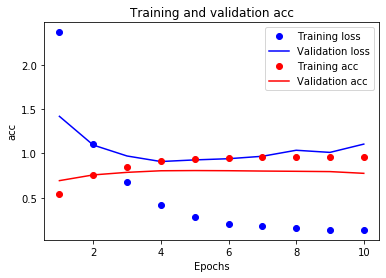

In [49]:
plot_curve(history.history)

# 3 eval

In [55]:
nn.evaluate(x_test_vec,y_test)

2246/2246 [==============================] - 1s 578us/step


[0.9726424499589847, 0.7858414960459524]